# IGI-Col 2019

A continuación se muestra el código en R y los resultados de la primera versión del IGI-Col 2019. En cada uno de los pasos se hace algunas observaciones que sirven de referencia para el lector. Algunas consideraciones que se deben de tomar en cuenta son:

* El análisis del comportamiento de las variables está a cargo del equipo de Colombia y depende de la construcción misma de la base de los datos. En este sentido, a ellos les corresponde definir cuales variables es conveniente que a mayor nivel mejor, y cuales van en sentido contrario.
* Es muy importante dar un tratamiento a los *missings*. Lo óptimo es que se imputen a partir del conocimiento de cómo funcionan los departamentos. En el caso donde no exista esta posibilidad, entonces se propone usar una imputación vía **Random Forest**
* Al final de la página se muestran los resultados


El primer paso es validar que todas las librerias estén cargadas, en caso contrario se pueden instalar usando _install.packages("  ")_ 

In [2]:
options(warn=-1)
library(FactoMineR)
library(VIM)
library(ggplot2)
library(foreign)  
library(grid)
library(gridExtra)
library(lattice)
library(randomForest)


In [3]:
setwd("C:/Users/jmartinez/Desktop/IGI-Col")
d <- read.csv("IGI1.csv", sep=";", dec=",", header=TRUE)

Vale la pena mirar el contenido de la base para saber su estructura

In [6]:
head(d,5)

Cod_DANE_Dep,Nombre_Departamento,Año,PersonalFiscalia.x100mil,UnidadesFiscalíax100mil,PorcUnidadesFiscalíaDelitosGraves,AgentesFiscaliax1milDelitos,CTIx100mil,PersonalSeguridadPublicax100mil,MagistradosJuecesx100mil,...,Delitos.por.departamento,Capacidad.Instalada.Cárceles,DesaparicionForzadax100mil,Ejecuciones.extrajudiciales,Tortura,Extorción,Secuestro,reclusosxCapacidadInstalada,ReclusosHomicidioxhomicidios,Cifra.negra.Porcentaje
5,ANTIOQUIA,2016,9.32,2.922788,8.900524,5.227827,9.380465,105.74065,9.12,...,116492,8118,6.72,0,4,664,37,1.787017,1.641377,11.909912
8,ATLANTICO,2016,27.96,1.245223,19.354839,18.089198,9.439593,243.82269,8.19,...,38476,1144,7.55,0,0,137,0,2.288462,1.519795,9.307669
11,BOGOTA D.C,2016,32.81,1.641604,31.297710,NA,10.701753,28.82205,7.69,...,NA,10166,42.18,0,0,430,25,1.487311,2.749674,18.565681
13,BOLIVAR,2016,20.97,2.026432,6.976744,16.151864,6.503434,205.94206,8.20,...,27551,1442,2.21,0,0,161,3,1.583218,1.143044,7.411774
15,BOYACA,2016,47.10,5.711572,8.219178,27.863920,18.621289,517.17110,19.64,...,21605,4551,9.86,0,0,77,1,1.245660,25.946228,13.301976


Se recomienda ver el comportamiento general de las variables, para ello se puede usar el siguiente código:

In [10]:

  plot.new()
  get( getOption( "device" ) )()
  par(mfrow=c(5,8))
  for (i in 4:40){
  hist(d[,i],xlab = names(d)[i],main = "", col="peachpuff", border="black")
  }


ERROR: Error in parse(text = x, srcfile = src): <text>:1:4: unexpected symbol
1: Se recomienda
       ^


![](https://user-images.githubusercontent.com/13545121/52171451-ff78f800-2722-11e9-9ddf-cb9048d47690.PNG)

## PASO 0. Valores perdidos

Es importante e identificar los valores perdidos, lo ideal es completarlos a partir de la información disponible y sabiendo el comportamiento en la región.

Sin embargo, puede darse el caso de que haya variables que aún tengan valores perdidos. A fin de solventar esta situación y poder desarrollar el análisis, se usa el modelo de clasificación denominado como **random forest** para imputar los valores perdidos. La lógica es crear muestras aleatorias con reemplazo para detectar patrones y posteriormente unir los resultados. Una virtud que tiene este tipo de clasificadores es que pertenecen al grupo de los denominados algoritmos supervisados, característica que los hacen más eficientes ya que van aprendiendo sobre por medio de las iteraciones.

Primero, hay que identificar las variables que tienen problemas de *missings*

In [7]:
names(d[,names(d)%in%colnames(d)[colSums(is.na(d)) > 0], drop = F])

[1] "AgentesFiscaliax1milDelitos"     "PersonalPenitenciarioxCapacidad"
[3] "Delitos.por.departamento"        "Capacidad.Instalada.Cárceles"

Luego se usa el algoritmo de **random forest** usando como variable objetivo alguna variable que no tenga *missings*

In [8]:
d <- rfImpute(UnidadesFiscalíax100mil ~ ., d,iter=15)

     |      Out-of-bag   |
Tree |      MSE  %Var(y) |
 300 |    3.498    52.38 |
     |      Out-of-bag   |
Tree |      MSE  %Var(y) |
 300 |    3.514    52.63 |
     |      Out-of-bag   |
Tree |      MSE  %Var(y) |
 300 |    3.455    51.74 |
     |      Out-of-bag   |
Tree |      MSE  %Var(y) |
 300 |    3.547    53.13 |
     |      Out-of-bag   |
Tree |      MSE  %Var(y) |
 300 |    3.458    51.79 |
     |      Out-of-bag   |
Tree |      MSE  %Var(y) |
 300 |    3.375    50.55 |
     |      Out-of-bag   |
Tree |      MSE  %Var(y) |
 300 |    3.747    56.12 |
     |      Out-of-bag   |
Tree |      MSE  %Var(y) |
 300 |    3.404    50.98 |
     |      Out-of-bag   |
Tree |      MSE  %Var(y) |
 300 |     3.74    56.01 |
     |      Out-of-bag   |
Tree |      MSE  %Var(y) |
 300 |    3.561    53.34 |
     |      Out-of-bag   |
Tree |      MSE  %Var(y) |
 300 |    3.747    56.11 |
     |      Out-of-bag   |
Tree |      MSE  %Var(y) |
 300 |    3.327    49.83 |
     |      Out-of-bag   |
T

Se usan 15 iteraciones de modo que el algoritmo vaya aprendiendo sobre la marcha y mejore la precisión. La lógica es identificar casos en donde se tenga un mismo patron que las variables donde hay missings. Para validar que los casos sean iguales, toma en cuenta todas las variables

## PASO 1. Construcción de las dimensiones

Una vez que ya no se tienen *missings*, se construyen las dimensiones

In [9]:
datos<-d
datos2 <- datos[,-c(1,2,3,14,23:32,34)]
  
#  x <- datos2[,1]
  
  #transformación de las variables min-max para que queden en escala 0 a 100
  
  MiniMax <- function(x){
    
    a <- min(x,na.rm = TRUE)
    b <- max(x,na.rm = TRUE)
    
    y <- (((x-a)/(b-a))*(100-0))+0
    y
  }
  
 # MiniMax(x)
  
  
  

La definición de las variables en donde el valor mayor implica una mejor situación y viceversa, depende del equipo de Colombia en función de cómo se capta la información, por lo que se asume que este análisis teórico ya está hecho.

In [10]:
datos3 <- apply(datos2,2,MiniMax)
  datos3 <- data.frame(datos3)
  datos3$PorcentajeReclusosSinSentencia1Instancia <- 100-datos3$PorcentajeReclusosSinSentencia1Instancia
  datos3$CausasPenales1InstanciaxInvestigaciones <- 100-datos3$CausasPenales1InstanciaxInvestigaciones
  datos3$PersonalPenitenciarioxCapacidad <- 100-datos3$PersonalPenitenciarioxCapacidad
  datos3$Cifra.negra.Porcentaje <- 100-datos3$Cifra.negra.Porcentaje
  datos3$reclusosxCapacidadInstalada <- 100-datos3$reclusosxCapacidadInstalada
  datos3$PresuntosDelitosx100mil <- 100-datos3$PresuntosDelitosx100mil


## PASO 2. Construcción del índice bajo la lógica de un índice sumatorio


In [12]:
  ESS <- datos3[,c(1,2,3,4,5,6)]
  ESJ <- datos3[,c(7,8,9)] #aqui faltan dos variables
  
  FSS <- datos3[,c(10,12,14)]
  FSJ <- datos3[,c(15,16,18)]
  
  CN <- as.matrix(datos3[,c(25)])

  
  
  ESS <- rowMeans(ESS, na.rm = TRUE)
  ESJ <- rowMeans(ESJ, na.rm = TRUE)
  FSS <- rowMeans(FSS, na.rm = TRUE)
  FSJ <- rowMeans(FSJ, na.rm = TRUE)
  #CN <- rowMeans(CN, na.rm = TRUE)

  IGI <- (ESS+ESJ+FSS+FSJ+CN)/5   


## PASO 3. Análisis de los resultados

Finalmente, se unen las dimensiones a la base de datos original

In [30]:
resultado<-data.frame(cbind(d,ESS,ESJ,FSS,FSJ,IGI))
r<-resultado[,c("Nombre_Departamento","ESS","ESJ","FSS","FSJ","IGI")]
r

Nombre_Departamento,ESS,ESJ,FSS,FSJ,IGI
ANTIOQUIA,15.737177,62.667357,40.11952,63.36174,47.69448
ATLANTICO,29.763131,34.926158,69.35328,48.34637,50.08785
BOGOTA D.C,39.558968,66.999560,84.44444,54.12590,54.47892
BOLIVAR,17.681686,46.165338,61.76776,52.28792,50.86102
BOYACA,37.517638,66.882427,83.74707,74.12930,62.54610
CALDAS,36.065591,53.949097,71.32097,65.92399,55.07199
CAQUETA,44.190981,48.349265,58.86477,67.12568,51.46563
CAUCA,26.812556,49.686521,64.37373,63.05087,48.26611
CESAR,25.516065,44.779872,68.44323,59.27420,46.33671
CORDOBA,18.065694,44.614519,55.31664,63.43141,48.82851


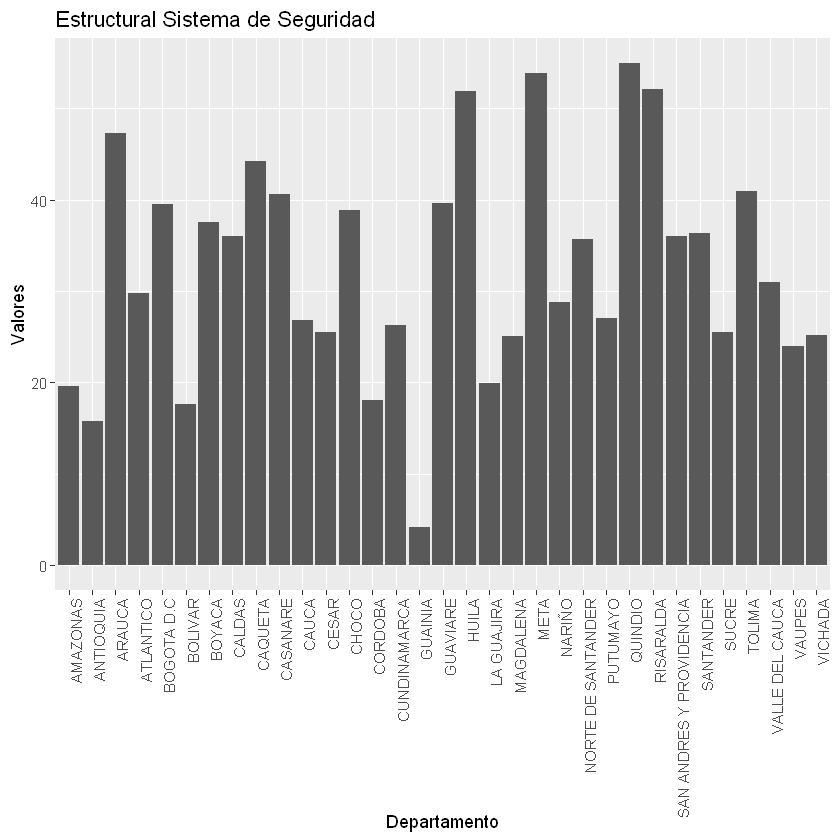

In [39]:
ggplot(r, aes(resultado$Nombre_Departamento,resultado$ESS))+geom_bar(stat = "identity")+theme(axis.text.x = element_text(angle = 90, hjust = 1))+xlab("Departamento")+ylab("Valores")+ggtitle("Estructural Sistema de Seguridad")

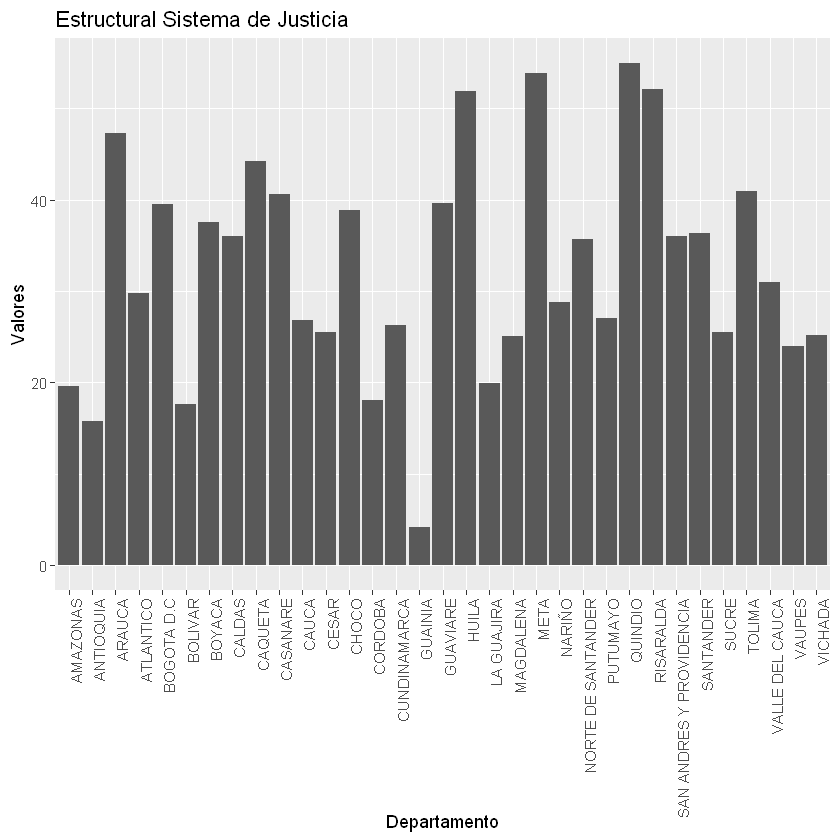

In [40]:
ggplot(r, aes(resultado$Nombre_Departamento,resultado$ESS))+geom_bar(stat = "identity")+theme(axis.text.x = element_text(angle = 90, hjust = 1))+xlab("Departamento")+ylab("Valores")+ggtitle("Estructural Sistema de Justicia")

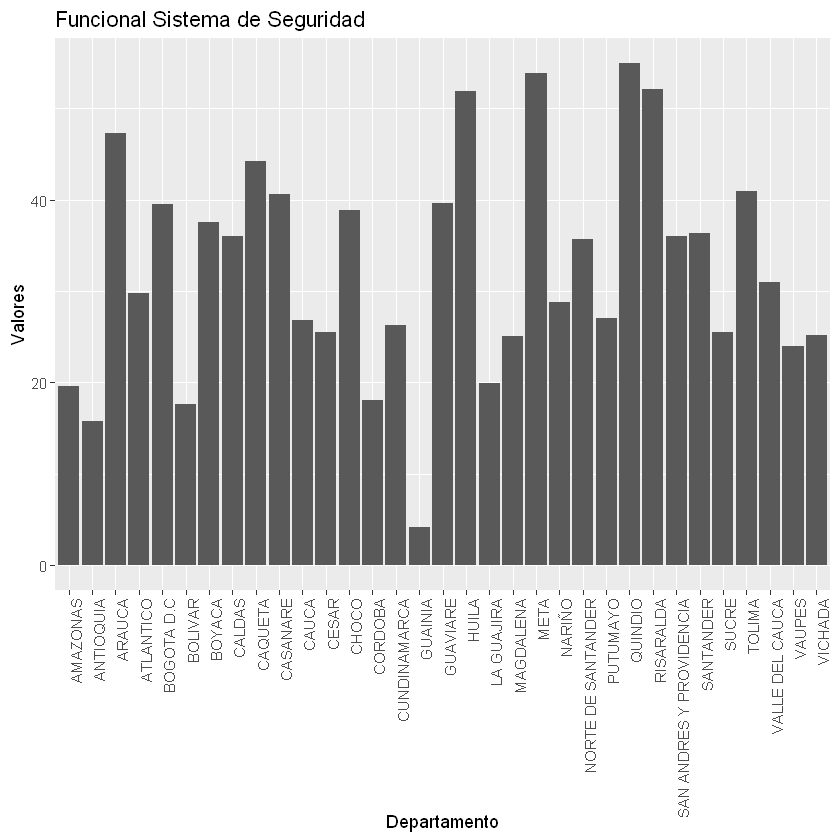

In [41]:
ggplot(r, aes(resultado$Nombre_Departamento,resultado$ESS))+geom_bar(stat = "identity")+theme(axis.text.x = element_text(angle = 90, hjust = 1))+xlab("Departamento")+ylab("Valores")+ggtitle("Funcional Sistema de Seguridad")

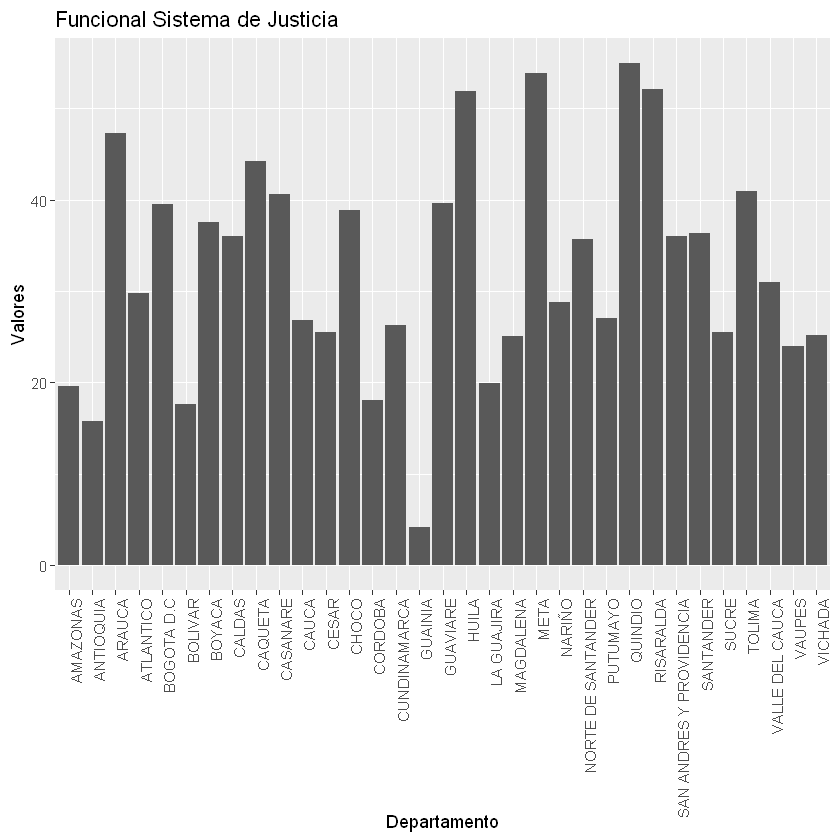

In [42]:
ggplot(r, aes(resultado$Nombre_Departamento,resultado$ESS))+geom_bar(stat = "identity")+theme(axis.text.x = element_text(angle = 90, hjust = 1))+xlab("Departamento")+ylab("Valores")+ggtitle("Funcional Sistema de Justicia")

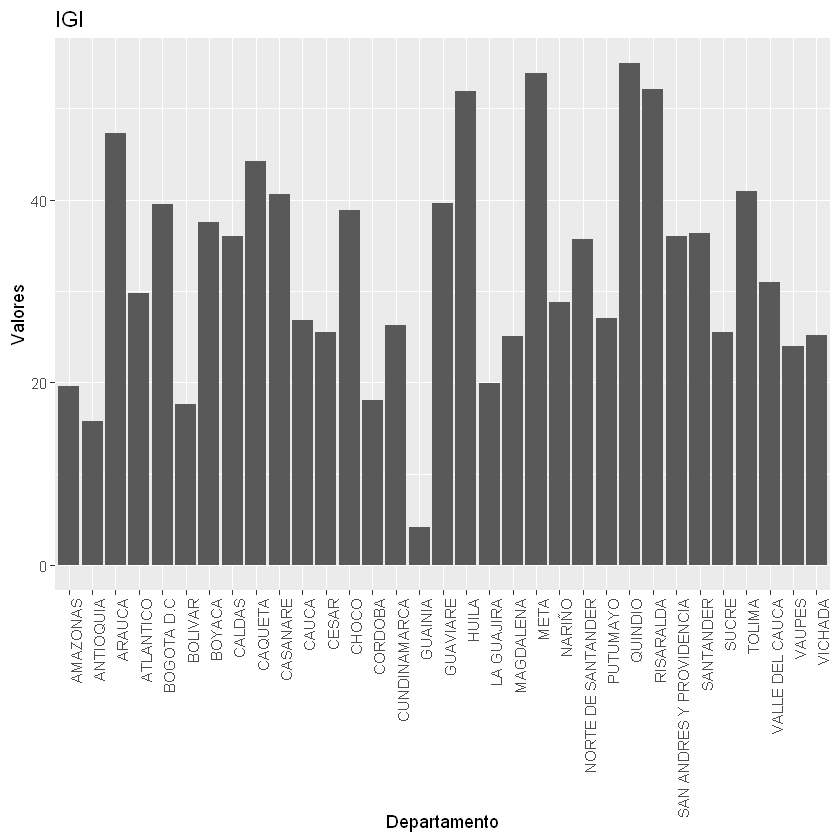

In [43]:
ggplot(r, aes(resultado$Nombre_Departamento,resultado$ESS))+geom_bar(stat = "identity")+theme(axis.text.x = element_text(angle = 90, hjust = 1))+xlab("Departamento")+ylab("Valores")+ggtitle("IGI")